In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [89]:
import urllib.request

In [90]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

filename = 'data-week-3.csv'

df = pd.read_csv(url)

In [91]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [92]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [93]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [94]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [95]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

### 4.2 Accuracy and dummy model

Accurcy measures the fraction of correct predictions. Specifically, it is the number of correct predictions divided by the total number of predictions.

We can change the decision threshold, it should not be always 0.5. But, in this particular problem, the best decision cutoff, associated with the hightest accuracy (80%), was indeed 0.5.

Note that if we build a dummy model in which the decision cutoff is 1, so the algorithm predicts that no clients will churn, the accuracy would be 73%. Thus, we can see that the improvement of the original model with respect to the dummy model is not as high as we would expect.

Therefore, in this problem accuracy can not tell us how good is the model because the dataset is unbalanced, which means that there are more instances from one category than the other. This is also known as class imbalance.

Classes and methods:

- np.linspace(x,y,z) – returns a numpy array starting at x until y with a z step
- Counter(x) – collection class that counts the number of instances that satisfy the x condition
- accuracy_score(x, y) – sklearn.metrics class for calculating the accuracy of a model, given a predicted x dataset and a target y dataset.

1. Evaluate the model on different thresholds
2. Check the accuracy of dummy baselines

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
len(y_val)

1409

In [98]:
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [99]:
1132/1409

0.8034066713981547

In [100]:
threshold = np.linspace(0, 1, 21)
scores = []

for t in threshold:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


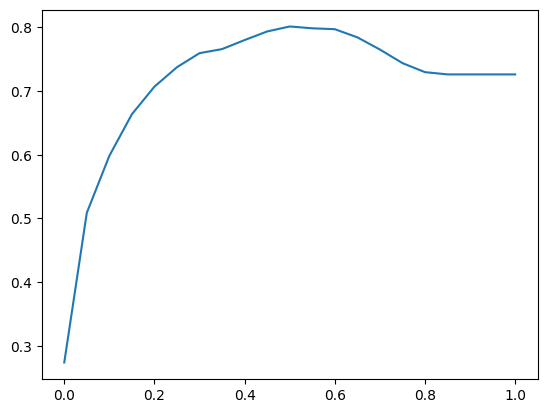

In [101]:
plt.plot(threshold, scores)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [104]:
threshold = np.linspace(0, 1, 21)
scores = []

for t in threshold:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [105]:
from collections import Counter

In [106]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

### 4.3 Confusion Table

- Different types of errors and correct decisions
- Arranging them in table

In [107]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [108]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [109]:
predict_positive

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [110]:
predict_positive & actual_positive

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [111]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [112]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [113]:
confusion_matrix = np.array([
    [tn, fp], 
    [fn, tp]
])

In [114]:
confusion_matrix

array([[915, 108],
       [172, 214]])

In [115]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

### 4.4 Precision and Recal

In [116]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.801277501774308)

In [117]:
p = tp / (tp + fp)
p

np.float64(0.6645962732919255)

In [118]:
tp

np.int64(214)

In [119]:
tp + fp

np.int64(322)

In [120]:
r = tp / (tp + fn)
r

np.float64(0.5544041450777202)

In [121]:
tp + fn

np.int64(386)

### 4.5 ROC Curves

#### TPR and FRP

In [122]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5544041450777202)

In [123]:
fpr = fp / (tn + fp)
fpr

np.float64(0.10557184750733138)

In [124]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [125]:
scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(903), np.int64(1), np.int64(120)),
 (np.float64(0.02), np.int64(384), np.int64(812), np.int64(2), np.int64(211)),
 (np.float64(0.03), np.int64(382), np.int64(753), np.int64(4), np.int64(270)),
 (np.float64(0.04), np.int64(380), np.int64(708), np.int64(6), np.int64(315)),
 (np.float64(0.05), np.int64(378), np.int64(684), np.int64(8), np.int64(339)),
 (np.float64(0.06), np.int64(376), np.int64(660), np.int64(10), np.int64(363)),
 (np.float64(0.07), np.int64(374), np.int64(631), np.int64(12), np.int64(392)),
 (np.float64(0.08), np.int64(371), np.int64(601), np.int64(15), np.int64(422)),
 (np.float64(0.09), np.int64(369), np.int64(569), np.int64(17), np.int64(454)),
 (np.float64(0.1), np.int64(367), np.int64(547), np.int64(19), np.int64(476)),
 (np.float64(0.11), np.int64(365), np.int64(520), np.int64(21), np.int64(503)),
 (np.float64(0.12), np.int64(363), np.int64(503),

In [126]:
df_scores = pd.DataFrame(scores)

In [127]:
df_scores

,0,1,2,3,4
0,0.00,386,1023,0,0
1,0.01,385,903,1,120
2,0.02,384,812,2,211
3,0.03,382,753,4,270
4,0.04,380,708,6,315
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [128]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)

In [129]:
df_scores[::10]  # looking at each 10th record

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,367,547,19,476
20,0.2,334,361,52,662
30,0.3,291,244,95,779
40,0.4,253,177,133,846
50,0.5,214,108,172,915
60,0.6,153,53,233,970
70,0.7,69,14,317,1009
80,0.8,5,0,381,1023
90,0.9,0,0,386,1023


In [130]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [131]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,547,19,476,0.950777,0.534702
20,0.2,334,361,52,662,0.865285,0.352884
30,0.3,291,244,95,779,0.753886,0.238514
40,0.4,253,177,133,846,0.655440,0.173021
50,0.5,214,108,172,915,0.554404,0.105572
60,0.6,153,53,233,970,0.396373,0.051808
70,0.7,69,14,317,1009,0.178756,0.013685
80,0.8,5,0,381,1023,0.012953,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


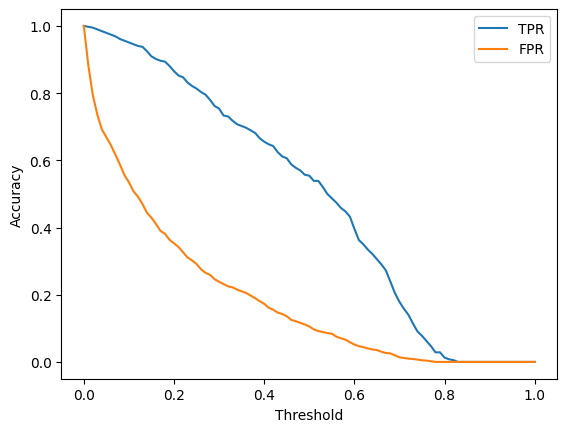

In [132]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.legend()

#### Random Model

In [133]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [134]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089], shape=(1409,))

In [135]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [136]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
        
    return df_scores

In [137]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

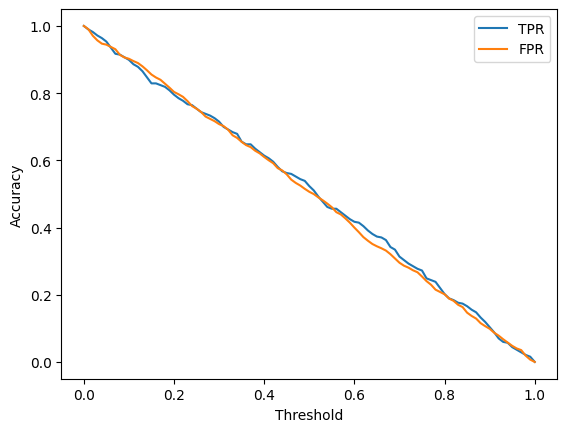

In [138]:
df_rand[::10]

plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.legend()

#### Ideal Model

In [139]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

The np.repeat function will create an array with 0’s the number of times of num_neg and 1’s the number of times of num_pos. This creates the order in the second set in the image.

In [140]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [141]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [142]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [143]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [144]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

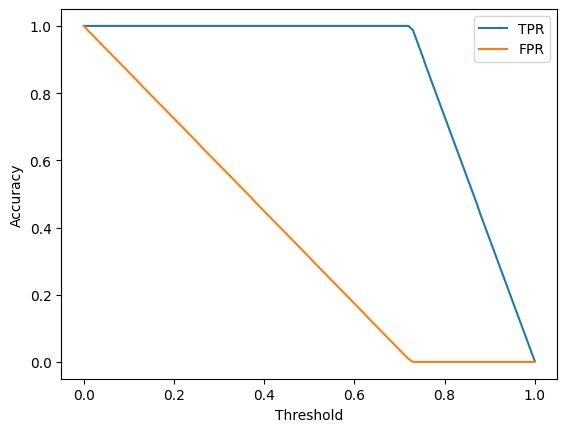

In [145]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')


plt.legend()

#### Puttting Everythithing together"""

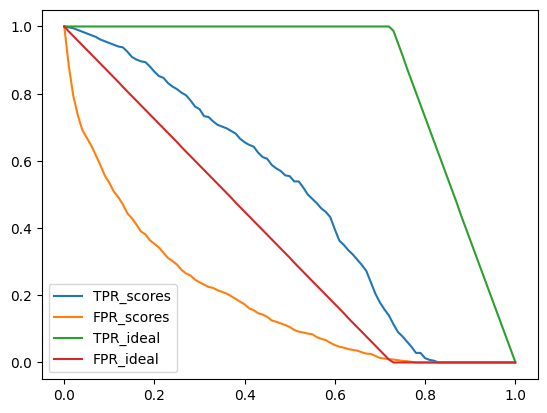

In [146]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR_scores')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR_scores')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR_ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR_ideal')

#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR_rand')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR_rand')

plt.legend()

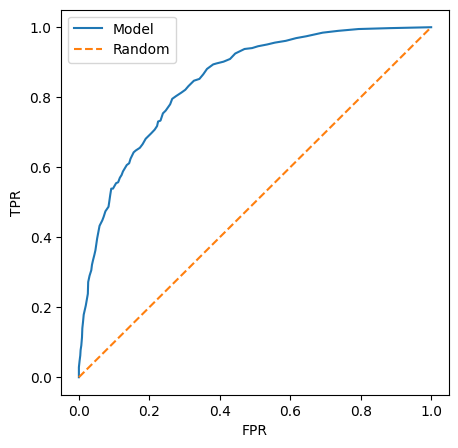

In [147]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [148]:
from sklearn.metrics import roc_curve

In [149]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)

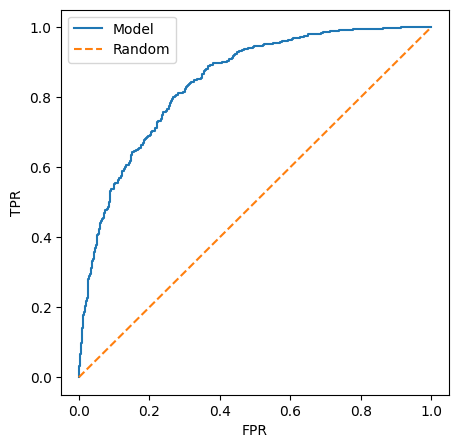

In [150]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

#### 4.6 ROC AUC
- Area under the ROC curve - useful metric
- Interpretation of AUC: 
    - Higher value means better model performance
    - Lower value means worse model performance

In [151]:
from sklearn.metrics import auc

In [152]:
auc(fpr, tpr)

0.8445038720820102

In [153]:
auc(df_scores.fpr, df_scores.tpr)

0.8443696534119398

In [154]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [155]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8445038720820102

In [156]:
from sklearn.metrics import roc_auc_score

In [157]:
roc_auc_score(y_val, y_pred)

0.8445038720820102

In [158]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]
neg

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.10417002, 0.29779033,
       0.15014869], shape=(1023,))

In [159]:
import random

Below is an example of how roc_auc_score is actually calculated

In [160]:
n = 1000000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
success / n

0.844595

We can also do this with Numpy

In [161]:
n = 1000000

random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.844451)

#### 4.7 Cross-Validation
- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [162]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [163]:
dv, model = train(df_train, y_train, C=0.001)

In [164]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [165]:
y_pred = predict(df_val, dv, model)

In [166]:
from sklearn.model_selection import KFold

In [167]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
train_idx, val_idx = next(kfold.split(df_full_train))

In [168]:
import sys
!uv add --yes --prefix {sys.prefix} tqdm

/bin/bash: line 1: uv: command not found


In [169]:
from tqdm.auto import tqdm

In [170]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores))) 

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.01 0.840 +- 0.008


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.1 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.5 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=1 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=5 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=10 0.842 +- 0.007


In [171]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8584032088573997

#### 4.8 Summary
General definitions:

- Metric: A single number that describes the performance of a model
- Accuracy: Fraction of correct answers; sometimes misleading
- Precision and recall are less misleading when we have class inbalance
- ROC Curve: A way to evaluate the performance at all thresholds; okay to use with imbalance
- K-Fold CV: More reliable estimate for performance (mean + std)

In brief, this weeks was about different metrics to evaluate a binary classifier. These measures included accuracy, confusion table, precision, recall, ROC curves(TPR, FRP, random model, and ideal model), and AUROC. Also, we talked about a different way to estimate the performance of the model and make the parameter tuning with cross-validation.